In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
housing = fetch_california_housing() #loading the data
X_train_full , X_test , y_train_full , y_test = train_test_split(housing.data , housing.target) #training and testing set
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full,y_train_full) #training and validation set

print(f"The size of training before splitting to valid is {X_train_full.shape}")
print(f"The size of testing before splitting to valid is {y_train_full.shape}")

print(f"The size of training after splitting to valid is {X_train.shape}")
print(f"The size of testing after splitting to valid is {y_train.shape}")

The size of training before splitting to valid is (15480, 8)
The size of testing before splitting to valid is (15480,)
The size of training after splitting to valid is (11610, 8)
The size of testing after splitting to valid is (11610,)


In [3]:
# scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
model  = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error" , optimizer="sgd",   metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7430 - mean_squared_error: 1.7430 - val_loss: 0.5849 - val_mean_squared_error: 0.5849
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6620 - mean_squared_error: 0.6620 - val_loss: 0.5390 - val_mean_squared_error: 0.5390
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4926 - mean_squared_error: 0.4926 - val_loss: 0.4724 - val_mean_squared_error: 0.4724
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4693 - mean_squared_error: 0.4693 - val_loss: 0.4529 - val_mean_squared_error: 0.4529
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4236 - mean_squared_error: 0.4236 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3906 - mean_squared_error: 0.3906 - val_loss: 0.4329 - val_mean_squared_error: 0.4329
Epoch 7/20
363/363 [========

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 794us/step - loss: 0.3679 - mean_squared_error: 0.3679


In [7]:
x_new = X_test[:3]
y_pred = model.predict(x_new)
y_pred

array([[3.5507307],
       [1.8669596],
       [3.511022 ]], dtype=float32)

In [8]:
y_test[:3]

array([3.302, 1.941, 3.791])

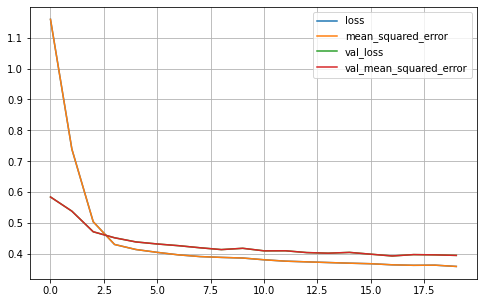

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [10]:
#using keras functional api to build complex models

input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

model.compile(loss="mean_squared_error" , optimizer="adam",   metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.7675 - mean_squared_error: 2.7675 - val_loss: 0.6058 - val_mean_squared_error: 0.6058
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5312 - mean_squared_error: 0.5312 - val_loss: 0.4745 - val_mean_squared_error: 0.4745
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4481 - mean_squared_error: 0.4481 - val_loss: 0.4365 - val_mean_squared_error: 0.4365
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4111 - mean_squared_error: 0.4111 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3865 - mean_squared_error: 0.3865 - val_loss: 0.3986 - val_mean_squared_error: 0.3986
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3824 - mean_squared_error: 0.3824 - val_loss: 0.3840 - val_mean_squared_error: 0.3840
Epoch 7/20
363/363 [========

In [11]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 794us/step - loss: 0.3190 - mean_squared_error: 0.3190


[0.3190046548843384, 0.3190046548843384]

In [12]:
# sending subsets of features refer hands on machine learning page 310

input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

model.compile(loss="mean_squared_error" , optimizer="adam",   metrics=[tf.keras.metrics.MeanSquaredError()])

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

history = model.fit((X_train_A,X_train_B),y_train,epochs=30,validation_data=((X_valid_A,X_valid_B),y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 2.4287 - mean_squared_error: 2.4287 - val_loss: 0.6452 - val_mean_squared_error: 0.6452
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7089 - mean_squared_error: 0.7089 - val_loss: 0.4778 - val_mean_squared_error: 0.4778
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4583 - mean_squared_error: 0.4583 - val_loss: 0.4413 - val_mean_squared_error: 0.4413
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4046 - mean_squared_error: 0.4046 - val_loss: 0.4124 - val_mean_squared_error: 0.4124
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3886 - mean_squared_error: 0.3886 - val_loss: 0.3945 - val_mean_squared_error: 0.3945
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3712 - mean_squared_error: 0.3712 - val_loss: 0.3833 - val_mean_squared_error: 0.3833
Epoch 7/30
363/363 [========

In [13]:
model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 801us/step - loss: 0.3184 - mean_squared_error: 0.3184


[0.31840208172798157, 0.31840208172798157]

In [14]:
model.predict((X_new_A,X_new_B))

array([[3.1828978],
       [1.859813 ],
       [3.7705607]], dtype=float32)

In [15]:
y_test[:3]

array([3.302, 1.941, 3.791])

In [16]:
#using an auxilary output for regulariztion page 312 in hands on machine learning


input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A,input_B],outputs=[output,aux_output])

model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer="adam")

X_train_A,X_train_B = X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,2:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4811 - output_loss: 2.3670 - aux_output_loss: 3.5082 - val_loss: 0.7080 - val_output_loss: 0.6766 - val_aux_output_loss: 0.9907
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6335 - output_loss: 0.6047 - aux_output_loss: 0.8925 - val_loss: 0.5089 - val_output_loss: 0.4896 - val_aux_output_loss: 0.6825
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - output_loss: 0.4459 - aux_output_loss: 0.6464 - val_loss: 0.4379 - val_output_loss: 0.4233 - val_aux_output_loss: 0.5694
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4214 - output_loss: 0.4062 - aux_output_loss: 0.5579 - val_loss: 0.4147 - val_output_loss: 0.4028 - val_aux_output_loss: 0.5215
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4042 - output_loss: 0.3913 - aux_output_loss: 0.5205 - val_loss: 0.4045 - val_output_loss: 0.3946 - val_aux_

In [17]:
total_loss,main_loss,aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 975us/step - loss: 0.3428 - output_loss: 0.3350 - aux_output_loss: 0.4132


In [18]:
model.predict([X_new_A,X_new_B])

[array([[3.3825269],
        [1.9521539],
        [3.7489944]], dtype=float32),
 array([[3.53301  ],
        [1.8421013],
        [3.8010488]], dtype=float32)]

In [19]:
#saving the model refer hands on machine learning page 314
model.save("californiamodel.h5")

In [21]:
# loading the model refer hands on machine learning page 315
models = keras.models.load_model("californiamodel.h5")

In [22]:
history1 = models.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3361 - output_loss: 0.3304 - aux_output_loss: 0.3874 - val_loss: 0.3510 - val_output_loss: 0.3459 - val_aux_output_loss: 0.3968
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3227 - output_loss: 0.3163 - aux_output_loss: 0.3796 - val_loss: 0.3418 - val_output_loss: 0.3364 - val_aux_output_loss: 0.3909
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3234 - output_loss: 0.3173 - aux_output_loss: 0.3782 - val_loss: 0.3580 - val_output_loss: 0.3524 - val_aux_output_loss: 0.4085
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3205 - output_loss: 0.3143 - aux_output_loss: 0.3761 - val_loss: 0.3495 - val_output_loss: 0.3441 - val_aux_output_loss: 0.3988
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3209 - output_loss: 0.3149 - aux_output_loss: 0.3754 - val_loss: 0.3400 - val_output_loss: 0.3346 - val_aux_

In [23]:
model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 900us/step - loss: 0.3428 - output_loss: 0.3350 - aux_output_loss: 0.4132


[0.34278029203414917, 0.33495476841926575, 0.41320839524269104]

In [ ]:
# using the call callbacks to save model at required check points